# Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data wrangling

In [3]:
# Gathering data
AusEx_2024_df = pd.read_csv('AUSEX_2024.csv', sep='~')
AusEx_2024_df.head()

,00000039650,650,650.1,Unnamed: 3,SA,E,Bio,0,1,Unnamed: 9,...,522,Unnamed: 13,7,W,054,1970,15311,A,650 SVB-003,1.1
0,84975,975.0,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,1,M,45.0,1978.0,10613.0,A,975 SVB-001,1
1,84975,975.0,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,1,M,46.0,1978.0,10613.0,A,975 SVB-001,1
2,84975,975.0,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,11,M,60.0,1963.0,10711.0,A,975 SVB-001,1
3,84975,975.0,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,6,M,12.0,2012.0,11024.0,9,975 SVB-002,1
4,84975,975.0,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,6,M,12.0,2012.0,11024.0,A,975 SVB-002,1


# Data cleaning

In [4]:
# Liste des noms de colonnes
colonnes = [
    "Mediennummer",
    "Sigel_bes_Bib",
    "Sigel_ausf_Bib",
    "Ausgabeort",
    "Fachst_1",
    "Fachst_2",
    "Aufstellung",
    "Standort",
    "MTC",
    "Inventarisierung",
    "Lieferant",
    "Sachgr.",
    "Untergr.",
    "StO",
    "Benutzergr.",
    "Geschlecht",
    "Alter",
    "Geburtsjahr",
    "Verkehrszelle_LOR",
    "Ausleihtyp",
    "Arbeitsplatznummer",
    "Anzahl"
]

# Lecture du CSV avec séparateur "~" et noms de colonnes
AusEx_2024_df = pd.read_csv(
    "AUSEX_2024.csv",
    sep="~",
    header=None,
    names=colonnes
)

AusEx_2024_df

,Mediennummer,Sigel_bes_Bib,Sigel_ausf_Bib,Ausgabeort,Fachst_1,Fachst_2,Aufstellung,Standort,MTC,Inventarisierung,...,Untergr.,StO,Benutzergr.,Geschlecht,Alter,Geburtsjahr,Verkehrszelle_LOR,Ausleihtyp,Arbeitsplatznummer,Anzahl
0,39650,650.0,650,NaN,SA,E,Bio,0.0,1,NaN,...,522,NaN,7,W,54.0,1970.0,15311.0,A,650 SVB-003,1
1,84975,975.0,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,1,M,45.0,1978.0,10613.0,A,975 SVB-001,1
2,84975,975.0,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,1,M,46.0,1978.0,10613.0,A,975 SVB-001,1
3,84975,975.0,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,11,M,60.0,1963.0,10711.0,A,975 SVB-001,1
4,84975,975.0,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,6,M,12.0,2012.0,11024.0,9,975 SVB-002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396850,7018985457,975.0,975,NaN,SL,K,Fran,1.0,1,20240812.0,...,NaN,NaN,6,W,3.0,2021.0,11111.0,A,975 SVB-001,1
1396851,7018985457,975.0,NaN,NaN,SL,K,Fran,1.0,1,20240812.0,...,NaN,NaN,6,M,3.0,2021.0,16142.0,T,NaN,1
1396852,7018998457,975.0,975,NaN,SL,E,Rus,0.0,1,20240812.0,...,NaN,NaN,11,W,33.0,1991.0,10022.0,A,975 SVB-001,1
1396853,7018998457,975.0,975,NaN,SL,E,Rus,0.0,1,20240812.0,...,NaN,NaN,11,W,34.0,1990.0,1113.0,A,975 SVB-003,1


In [5]:
AusEx_2024_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396855 entries, 0 to 1396854
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Mediennummer        1396855 non-null  int64  
 1   Sigel_bes_Bib       1396854 non-null  float64
 2   Sigel_ausf_Bib      993609 non-null   object 
 3   Ausgabeort          29443 non-null    object 
 4   Fachst_1            1396854 non-null  object 
 5   Fachst_2            1396854 non-null  object 
 6   Aufstellung         554291 non-null   object 
 7   Standort            1396854 non-null  float64
 8   MTC                 1396855 non-null  int64  
 9   Inventarisierung    1371424 non-null  float64
 10  Lieferant           1396855 non-null  int64  
 11  Sachgr.             1396651 non-null  object 
 12  Untergr.            395693 non-null   object 
 13  StO                 453068 non-null   object 
 14  Benutzergr.         1396855 non-null  int64  
 15  Geschlecht     

In [6]:
AusEx_2024_df["Sigel_bes_Bib"] = (
    AusEx_2024_df["Sigel_bes_Bib"]
    .astype(float)  # au cas où il y ait encore du float
    .astype("Int64") # Pandas integer nullable
    .astype(str)    # en texte, pour éviter le .0
)
AusEx_2024_df.head(3)

,Mediennummer,Sigel_bes_Bib,Sigel_ausf_Bib,Ausgabeort,Fachst_1,Fachst_2,Aufstellung,Standort,MTC,Inventarisierung,...,Untergr.,StO,Benutzergr.,Geschlecht,Alter,Geburtsjahr,Verkehrszelle_LOR,Ausleihtyp,Arbeitsplatznummer,Anzahl
0,39650,650,650,NaN,SA,E,Bio,0.0,1,NaN,...,522,NaN,7,W,54.0,1970.0,15311.0,A,650 SVB-003,1
1,84975,975,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,1,M,45.0,1978.0,10613.0,A,975 SVB-001,1
2,84975,975,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,1,M,46.0,1978.0,10613.0,A,975 SVB-001,1


In [7]:
AusEx_2024_df["Verkehrszelle_LOR"] = (
    AusEx_2024_df["Verkehrszelle_LOR"]
    .astype(float)  # au cas où il y ait encore du float
    .astype("Int64") # Pandas integer nullable
    .astype(str)    # en texte, pour éviter le .0
)
AusEx_2024_df.head(3)

,Mediennummer,Sigel_bes_Bib,Sigel_ausf_Bib,Ausgabeort,Fachst_1,Fachst_2,Aufstellung,Standort,MTC,Inventarisierung,...,Untergr.,StO,Benutzergr.,Geschlecht,Alter,Geburtsjahr,Verkehrszelle_LOR,Ausleihtyp,Arbeitsplatznummer,Anzahl
0,39650,650,650,NaN,SA,E,Bio,0.0,1,NaN,...,522,NaN,7,W,54.0,1970.0,15311,A,650 SVB-003,1
1,84975,975,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,1,M,45.0,1978.0,10613,A,975 SVB-001,1
2,84975,975,975,NaN,SA,E,Bio,0.0,1,NaN,...,805,NaN,1,M,46.0,1978.0,10613,A,975 SVB-001,1


In [8]:
AusEx_2024_df["Standort"] = (
    AusEx_2024_df["Standort"]
    .astype(float)  # au cas où il y ait encore du float
    .astype("Int64") # Pandas integer nullable
    .astype(str)    # en texte, pour éviter le .0
)
AusEx_2024_df.head(3)

,Mediennummer,Sigel_bes_Bib,Sigel_ausf_Bib,Ausgabeort,Fachst_1,Fachst_2,Aufstellung,Standort,MTC,Inventarisierung,...,Untergr.,StO,Benutzergr.,Geschlecht,Alter,Geburtsjahr,Verkehrszelle_LOR,Ausleihtyp,Arbeitsplatznummer,Anzahl
0,39650,650,650,NaN,SA,E,Bio,0,1,NaN,...,522,NaN,7,W,54.0,1970.0,15311,A,650 SVB-003,1
1,84975,975,975,NaN,SA,E,Bio,0,1,NaN,...,805,NaN,1,M,45.0,1978.0,10613,A,975 SVB-001,1
2,84975,975,975,NaN,SA,E,Bio,0,1,NaN,...,805,NaN,1,M,46.0,1978.0,10613,A,975 SVB-001,1


In [9]:
AusEx_2024_df["Mediennummer"] = (
    AusEx_2024_df["Mediennummer"]
    .astype(float)  # au cas où il y ait encore du float
    .astype("Int64") # Pandas integer nullable
    .astype(str)    # en texte, pour éviter le .0
)
AusEx_2024_df.head(3)

,Mediennummer,Sigel_bes_Bib,Sigel_ausf_Bib,Ausgabeort,Fachst_1,Fachst_2,Aufstellung,Standort,MTC,Inventarisierung,...,Untergr.,StO,Benutzergr.,Geschlecht,Alter,Geburtsjahr,Verkehrszelle_LOR,Ausleihtyp,Arbeitsplatznummer,Anzahl
0,39650,650,650,NaN,SA,E,Bio,0,1,NaN,...,522,NaN,7,W,54.0,1970.0,15311,A,650 SVB-003,1
1,84975,975,975,NaN,SA,E,Bio,0,1,NaN,...,805,NaN,1,M,45.0,1978.0,10613,A,975 SVB-001,1
2,84975,975,975,NaN,SA,E,Bio,0,1,NaN,...,805,NaN,1,M,46.0,1978.0,10613,A,975 SVB-001,1


In [10]:
# data types conversion
AusEx_2024_df.astype({
    'Mediennummer':'object',
    'Sigel_bes_Bib':'object',
    'Standort':'object',
    'MTC':'object',
    'Lieferant':'object',
    'Benutzergr.': 'object',
    'Alter':'Int64',
    'Verkehrszelle_LOR':'object',
    'Anzahl':'int64'
}).dtypes
AusEx_2024_df = AusEx_2024_df.astype({
    'Mediennummer':'object',
    'Sigel_bes_Bib':'object',
    'Standort':'object',
    'MTC':'object',
    'Lieferant':'object',
    'Benutzergr.': 'object',
    'Alter':'Int64',
    'Verkehrszelle_LOR':'object',
    'Anzahl':'int64'
})
AusEx_2024_df.dtypes

Mediennummer           object
Sigel_bes_Bib          object
Sigel_ausf_Bib         object
Ausgabeort             object
Fachst_1               object
Fachst_2               object
Aufstellung            object
Standort               object
MTC                    object
Inventarisierung      float64
Lieferant              object
Sachgr.                object
Untergr.               object
StO                    object
Benutzergr.            object
Geschlecht             object
Alter                   Int64
Geburtsjahr           float64
Verkehrszelle_LOR      object
Ausleihtyp             object
Arbeitsplatznummer     object
Anzahl                  int64
dtype: object

In [11]:
# conversion années en type datetime
AusEx_2024_df['Inventarisierung'] = pd.to_datetime(
    AusEx_2024_df['Inventarisierung'], format='%Y%m%d', errors='coerce'
)

In [12]:
AusEx_2024_df['Geburtsjahr'] = AusEx_2024_df['Geburtsjahr'].astype("Int64")
AusEx_2024_df.dtypes

Mediennummer                  object
Sigel_bes_Bib                 object
Sigel_ausf_Bib                object
Ausgabeort                    object
Fachst_1                      object
Fachst_2                      object
Aufstellung                   object
Standort                      object
MTC                           object
Inventarisierung      datetime64[ns]
Lieferant                     object
Sachgr.                       object
Untergr.                      object
StO                           object
Benutzergr.                   object
Geschlecht                    object
Alter                          Int64
Geburtsjahr                    Int64
Verkehrszelle_LOR             object
Ausleihtyp                    object
Arbeitsplatznummer            object
Anzahl                         int64
dtype: object

In [13]:
# test the null values
AusEx_2024_df.isnull().sum()

Mediennummer                0
Sigel_bes_Bib               0
Sigel_ausf_Bib         403246
Ausgabeort            1367412
Fachst_1                    1
Fachst_2                    1
Aufstellung            842564
Standort                    0
MTC                         0
Inventarisierung        25431
Lieferant                   0
Sachgr.                   204
Untergr.              1001162
StO                    943787
Benutzergr.                 0
Geschlecht              48311
Alter                   48300
Geburtsjahr             48300
Verkehrszelle_LOR           0
Ausleihtyp                  0
Arbeitsplatznummer     403246
Anzahl                      0
dtype: int64

In [14]:
# delete colonnes
AusEx_2024_df = AusEx_2024_df.drop(columns=['Ausgabeort', 'Lieferant', 'Arbeitsplatznummer', 'Geburtsjahr', 'Standort', 'Untergr.'])
AusEx_2024_df.head(3)

,Mediennummer,Sigel_bes_Bib,Sigel_ausf_Bib,Fachst_1,Fachst_2,Aufstellung,MTC,Inventarisierung,Sachgr.,StO,Benutzergr.,Geschlecht,Alter,Verkehrszelle_LOR,Ausleihtyp,Anzahl
0,39650,650,650,SA,E,Bio,1,NaT,Gesch,NaN,7,W,54,15311,A,1
1,84975,975,975,SA,E,Bio,1,NaT,Ku,NaN,1,M,45,10613,A,1
2,84975,975,975,SA,E,Bio,1,NaT,Ku,NaN,1,M,46,10613,A,1


In [15]:
# test décalage des colonnes sur Medienummer concerné
AusEx_2024_df[AusEx_2024_df['Mediennummer'] == "1982971"]

,Mediennummer,Sigel_bes_Bib,Sigel_ausf_Bib,Fachst_1,Fachst_2,Aufstellung,MTC,Inventarisierung,Sachgr.,StO,Benutzergr.,Geschlecht,Alter,Verkehrszelle_LOR,Ausleihtyp,Anzahl
146,1982971,971,243,SA,E,NaN,1,NaT,Pä,NaN,1,M,43,<NA>,A,1
147,1982971,971,243,SA,E,NaN,1,NaT,Pä,NaN,1,M,44,<NA>,A,1
148,1982971,971,243,SA,E,NaN,1,NaT,Pä,NaN,1,M,44,<NA>,A,2
149,1982971,971,243,SA,E,NaN,1,NaT,Pä,NaN,1,M,44,<NA>,A,1
150,1982971,971,243,SA,E,NaN,1,NaT,Pä,NaN,1,M,44,<NA>,T,1
151,1982971,971,243,SA,E,NaN,1,NaT,Pä,NaN,1,M,44,<NA>,T,2
152,1982971,971,NaN,SA,E,NaN,1,NaT,Pä,NaN,1,M,43,<NA>,T,2
153,1982971,971,NaN,SA,E,NaN,1,NaT,Pä,NaN,1,M,44,<NA>,T,7


In [16]:
# delete null values
AusEx_2024_df.dropna(subset=['Alter'], inplace=True)
AusEx_2024_df.dropna(subset=['Geschlecht'], inplace=True)
AusEx_2024_df.dropna(subset=['Inventarisierung'], inplace=True)
AusEx_2024_df.head(3)

,Mediennummer,Sigel_bes_Bib,Sigel_ausf_Bib,Fachst_1,Fachst_2,Aufstellung,MTC,Inventarisierung,Sachgr.,StO,Benutzergr.,Geschlecht,Alter,Verkehrszelle_LOR,Ausleihtyp,Anzahl
20,310650,650,650,SA,K,NaN,1,2004-10-27,4.3/Med,NaN,6,W,6,15311,A,1
21,310650,650,650,SA,K,NaN,1,2004-10-27,4.3/Med,NaN,6,W,9,15323,A,1
25,381650,650,NaN,SL,K,NaN,1,2004-10-27,4.1,NaN,1,W,36,10732,T,2


In [17]:
# test the null values
AusEx_2024_df.isnull().sum()

Mediennummer              0
Sigel_bes_Bib             0
Sigel_ausf_Bib       387615
Fachst_1                  1
Fachst_2                  1
Aufstellung          798357
MTC                       0
Inventarisierung          0
Sachgr.                 191
StO                  885368
Benutzergr.               0
Geschlecht                0
Alter                     0
Verkehrszelle_LOR         0
Ausleihtyp                0
Anzahl                    0
dtype: int64

In [18]:
# drop value J in Fachst_2
# Eliminer les lignes avec J en Fachst_2
AusEx_2024_df = AusEx_2024_df[AusEx_2024_df['Fachst_2'] != "J"]
AusEx_2024_df.shape
# ancien contenu AusEx_2024_df = 1.396.855 rows x 22 features
# nouveau contenu AusEx_2024_df = 1.325.062 rows x 16 features

(1323062, 16)

In [19]:
# test Duplicate
duplicate_rows = AusEx_2024_df.duplicated().sum()
print(duplicate_rows)
duplicates_only = AusEx_2024_df[AusEx_2024_df.duplicated(keep=False)]
duplicates_only.head(3)
# Les doulons ne seront pas éliminer car il s'agit de plusieurs emprunts du même média par le même utilisateur la même année.

36945


,Mediennummer,Sigel_bes_Bib,Sigel_ausf_Bib,Fachst_1,Fachst_2,Aufstellung,MTC,Inventarisierung,Sachgr.,StO,Benutzergr.,Geschlecht,Alter,Verkehrszelle_LOR,Ausleihtyp,Anzahl
108,1490650,650,650,SL,E,NaN,1,2004-10-21,Roman,NaN,1,W,79,15415,A,1
109,1490650,650,650,SL,E,NaN,1,2004-10-21,Roman,NaN,1,W,79,15415,A,1
434,6002650,655,655,SA,K,NaN,8,2006-01-02,Zei,NaN,6,M,8,15712,A,1


In [20]:
# comptabiliser les valeurs uniques
AusEx_2024_df.nunique()


Mediennummer         249521
Sigel_bes_Bib             9
Sigel_ausf_Bib           81
Fachst_1                  4
Fachst_2                  2
Aufstellung             177
MTC                      16
Inventarisierung       6038
Sachgr.                 199
StO                       1
Benutzergr.               8
Geschlecht                3
Alter                   101
Verkehrszelle_LOR      1055
Ausleihtyp                4
Anzahl                   25
dtype: int64

In [21]:
AusEx_2024_df.describe()

,Inventarisierung,Alter,Anzahl
count,1323062,1323062.0,1.323062e+06
mean,2019-08-25 07:17:17.660215552,30.165308,1.231366e+00
min,1999-05-26 00:00:00,0.0,1.000000e+00
25%,2017-04-13 00:00:00,8.0,1.000000e+00
50%,2020-09-24 00:00:00,33.0,1.000000e+00
75%,2023-03-16 00:00:00,47.0,1.000000e+00
max,2024-12-30 00:00:00,110.0,3.000000e+01
std,NaN,22.577944,7.577448e-01


# Exploratory Data Analysis (EDA) 

Pas de corrélation

⚠️ Le DataFrame a 1,323,062 lignes → échantillonnage de 10000 lignes.


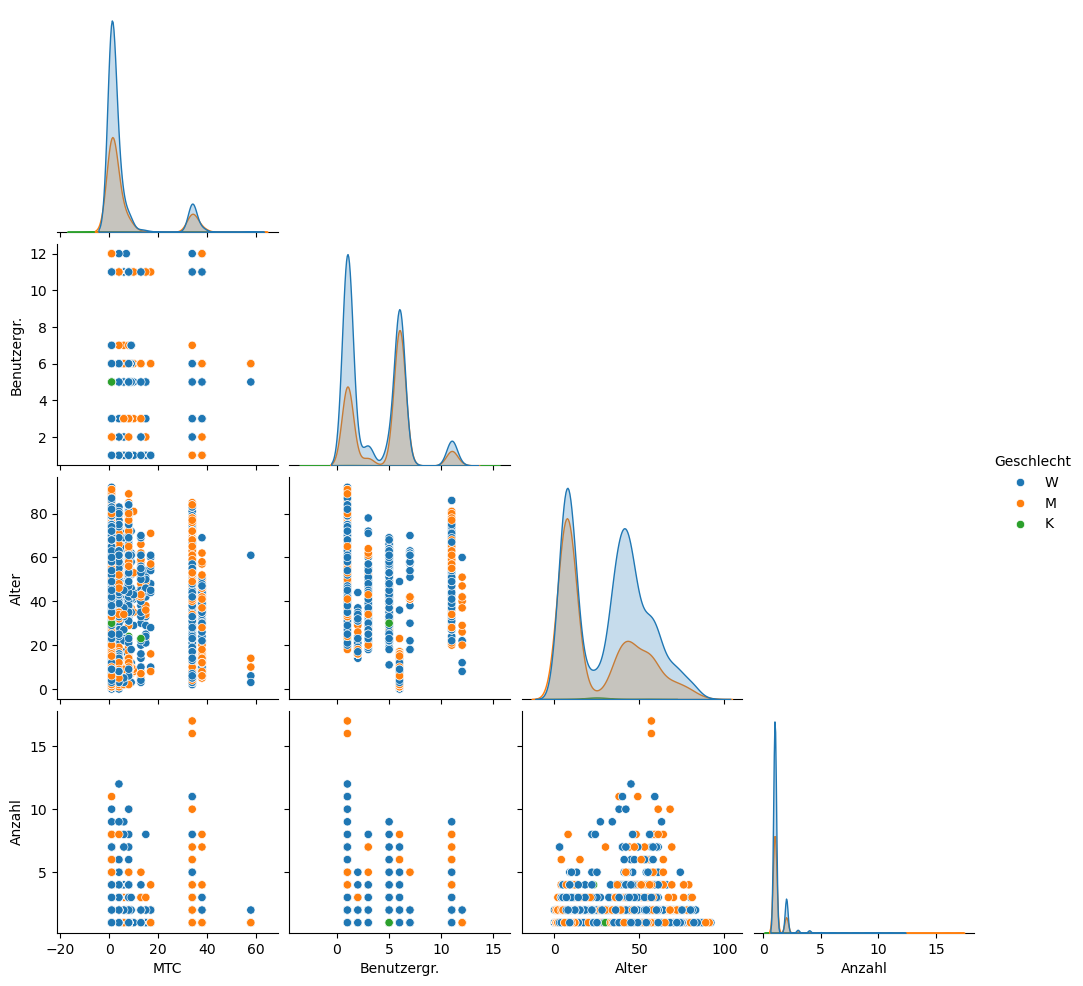

In [22]:

def safe_pairplot(df, hue=None, max_samples=10000, random_state=42, **kwargs):
    """
    Trace un pairplot avec seaborn sans bloquer le notebook.
    Si df est trop grand, on échantillonne max_samples lignes.
    """
    n = len(df)
    if n > max_samples:
        print(f"⚠️ Le DataFrame a {n:,} lignes → échantillonnage de {max_samples} lignes.")
        df = df.sample(max_samples, random_state=random_state)
    else:
        print(f"✅ Le DataFrame a {n:,} lignes → pas d'échantillonnage.")

    return sns.pairplot(df, hue=hue, **kwargs)

# Exemple d'utilisation
safe_pairplot(AusEx_2024_df, hue="Geschlecht", corner=True)


In [ ]:
lineplot x=alter, y=ausleihzahl, hue=Geschlecht

# The end